In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# Hyperparameters
latent_dim = 100
batch_size = 128
epochs = 100
lr = 0.0002
image_size = 28 * 28

In [5]:
# Transform and Load MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize to range [-1, 1]
])

mnist_data = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
data_loader = DataLoader(mnist_data, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [6]:
# Generator Model
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, image_size),
            nn.Tanh()  # Output in range [-1, 1]
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), 1, 28, 28)
        return img

In [7]:
# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Probability of being real
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)
        return validity

In [8]:
# Initialize Generator and Discriminator
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

In [9]:
# Loss Function and Optimizers
adversarial_loss = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

Epoch [1/100] | D Loss: 1.3483 | G Loss: 0.7850
Epoch [2/100] | D Loss: 1.2408 | G Loss: 1.0380
Epoch [3/100] | D Loss: 1.2548 | G Loss: 0.8615
Epoch [4/100] | D Loss: 1.1350 | G Loss: 1.0466
Epoch [5/100] | D Loss: 1.2124 | G Loss: 1.0193
Epoch [6/100] | D Loss: 1.2177 | G Loss: 0.8901
Epoch [7/100] | D Loss: 1.1500 | G Loss: 0.7828
Epoch [8/100] | D Loss: 1.2382 | G Loss: 0.8091
Epoch [9/100] | D Loss: 1.2073 | G Loss: 1.0283
Epoch [10/100] | D Loss: 1.2670 | G Loss: 0.6711


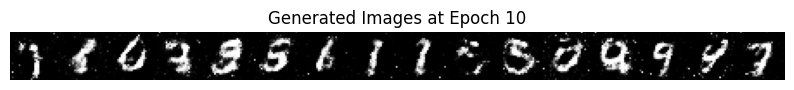

Epoch [11/100] | D Loss: 1.2436 | G Loss: 1.0136
Epoch [12/100] | D Loss: 1.2492 | G Loss: 1.0903
Epoch [13/100] | D Loss: 1.2214 | G Loss: 0.8783
Epoch [14/100] | D Loss: 1.2548 | G Loss: 0.6472
Epoch [15/100] | D Loss: 1.2332 | G Loss: 1.0939
Epoch [16/100] | D Loss: 1.2676 | G Loss: 0.7497
Epoch [17/100] | D Loss: 1.4581 | G Loss: 0.4396
Epoch [18/100] | D Loss: 1.3890 | G Loss: 0.5543
Epoch [19/100] | D Loss: 1.3041 | G Loss: 0.9744
Epoch [20/100] | D Loss: 1.4150 | G Loss: 1.4727


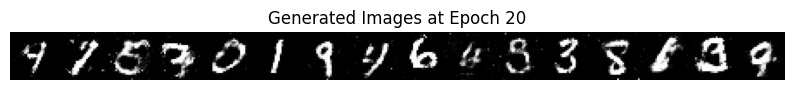

Epoch [21/100] | D Loss: 1.2213 | G Loss: 1.0396
Epoch [22/100] | D Loss: 1.2762 | G Loss: 1.0050
Epoch [23/100] | D Loss: 1.2486 | G Loss: 1.2051
Epoch [24/100] | D Loss: 1.2301 | G Loss: 0.7414
Epoch [25/100] | D Loss: 1.3268 | G Loss: 1.0478
Epoch [26/100] | D Loss: 1.1759 | G Loss: 0.8128
Epoch [27/100] | D Loss: 1.2907 | G Loss: 0.8687
Epoch [28/100] | D Loss: 1.2259 | G Loss: 1.0617
Epoch [29/100] | D Loss: 1.2478 | G Loss: 0.9656
Epoch [30/100] | D Loss: 1.2235 | G Loss: 0.9287


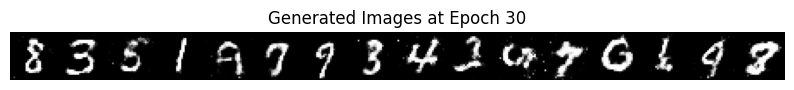

Epoch [31/100] | D Loss: 1.3359 | G Loss: 0.9458
Epoch [32/100] | D Loss: 1.4222 | G Loss: 1.3870
Epoch [33/100] | D Loss: 1.2538 | G Loss: 0.8806
Epoch [34/100] | D Loss: 1.3346 | G Loss: 0.8202
Epoch [35/100] | D Loss: 1.2288 | G Loss: 0.7170
Epoch [36/100] | D Loss: 1.2972 | G Loss: 0.8309
Epoch [37/100] | D Loss: 1.3467 | G Loss: 1.2456
Epoch [38/100] | D Loss: 1.2833 | G Loss: 1.0309
Epoch [39/100] | D Loss: 1.1698 | G Loss: 0.8209
Epoch [40/100] | D Loss: 1.2566 | G Loss: 1.0319


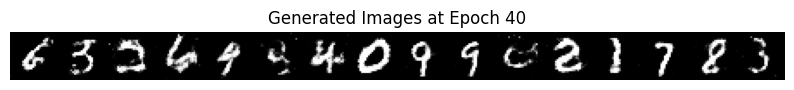

Epoch [41/100] | D Loss: 1.2670 | G Loss: 0.7219
Epoch [42/100] | D Loss: 1.2606 | G Loss: 1.0665
Epoch [43/100] | D Loss: 1.2282 | G Loss: 1.2889
Epoch [44/100] | D Loss: 1.2983 | G Loss: 0.7002
Epoch [45/100] | D Loss: 1.3086 | G Loss: 0.7357
Epoch [46/100] | D Loss: 1.2577 | G Loss: 0.8610
Epoch [47/100] | D Loss: 1.2380 | G Loss: 0.8011
Epoch [48/100] | D Loss: 1.3040 | G Loss: 1.0124
Epoch [49/100] | D Loss: 1.1902 | G Loss: 1.0523
Epoch [50/100] | D Loss: 1.2732 | G Loss: 0.8374


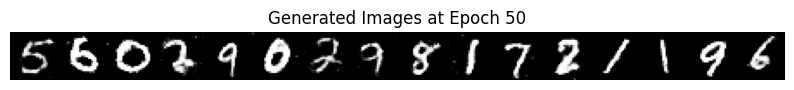

Epoch [51/100] | D Loss: 1.2222 | G Loss: 1.0500
Epoch [52/100] | D Loss: 1.2667 | G Loss: 0.6471
Epoch [53/100] | D Loss: 1.2559 | G Loss: 0.8539
Epoch [54/100] | D Loss: 1.3454 | G Loss: 0.6462
Epoch [55/100] | D Loss: 1.2405 | G Loss: 0.8261
Epoch [56/100] | D Loss: 1.1788 | G Loss: 0.9768
Epoch [57/100] | D Loss: 1.2635 | G Loss: 0.8772
Epoch [58/100] | D Loss: 1.2429 | G Loss: 1.2775
Epoch [59/100] | D Loss: 1.2362 | G Loss: 0.9550
Epoch [60/100] | D Loss: 1.3042 | G Loss: 0.9906


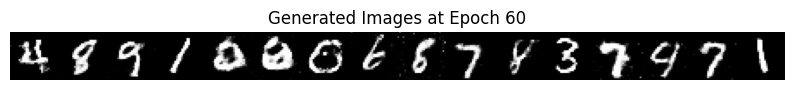

Epoch [61/100] | D Loss: 1.2443 | G Loss: 1.0765
Epoch [62/100] | D Loss: 1.2746 | G Loss: 0.9411
Epoch [63/100] | D Loss: 1.1932 | G Loss: 1.1905
Epoch [64/100] | D Loss: 1.2456 | G Loss: 1.0617
Epoch [65/100] | D Loss: 1.2496 | G Loss: 1.2313
Epoch [66/100] | D Loss: 1.2985 | G Loss: 0.7964
Epoch [67/100] | D Loss: 1.2660 | G Loss: 1.2386
Epoch [68/100] | D Loss: 1.1756 | G Loss: 1.0146
Epoch [69/100] | D Loss: 1.2696 | G Loss: 0.8309
Epoch [70/100] | D Loss: 1.2351 | G Loss: 0.9713


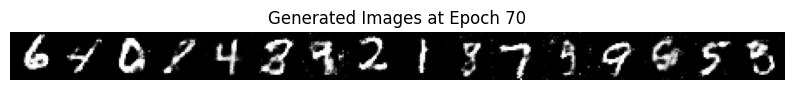

Epoch [71/100] | D Loss: 1.2518 | G Loss: 0.9696
Epoch [72/100] | D Loss: 1.1989 | G Loss: 0.8162
Epoch [73/100] | D Loss: 1.3458 | G Loss: 1.4393
Epoch [74/100] | D Loss: 1.1709 | G Loss: 1.2376
Epoch [75/100] | D Loss: 1.2526 | G Loss: 1.2531
Epoch [76/100] | D Loss: 1.1870 | G Loss: 0.8666
Epoch [77/100] | D Loss: 1.2250 | G Loss: 1.3416
Epoch [78/100] | D Loss: 1.3486 | G Loss: 0.6703
Epoch [79/100] | D Loss: 1.1657 | G Loss: 0.7877
Epoch [80/100] | D Loss: 1.1796 | G Loss: 0.9450


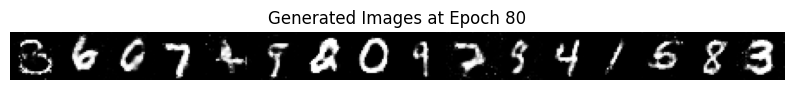

Epoch [81/100] | D Loss: 1.1914 | G Loss: 1.0107
Epoch [82/100] | D Loss: 1.1264 | G Loss: 0.9975
Epoch [83/100] | D Loss: 1.2094 | G Loss: 1.2741
Epoch [84/100] | D Loss: 1.2012 | G Loss: 1.1852
Epoch [85/100] | D Loss: 1.2776 | G Loss: 0.7539
Epoch [86/100] | D Loss: 1.2171 | G Loss: 0.5663
Epoch [87/100] | D Loss: 1.1848 | G Loss: 1.1449
Epoch [88/100] | D Loss: 1.2333 | G Loss: 0.7378
Epoch [89/100] | D Loss: 1.2095 | G Loss: 1.0244
Epoch [90/100] | D Loss: 1.3017 | G Loss: 1.0697


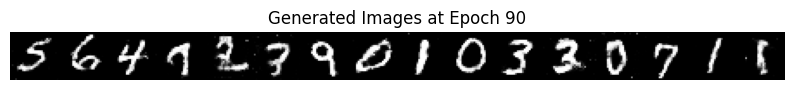

Epoch [91/100] | D Loss: 1.4005 | G Loss: 1.4182
Epoch [92/100] | D Loss: 1.1757 | G Loss: 1.1967
Epoch [93/100] | D Loss: 1.1412 | G Loss: 1.2146
Epoch [94/100] | D Loss: 1.1242 | G Loss: 0.8228
Epoch [95/100] | D Loss: 1.2664 | G Loss: 1.5391
Epoch [96/100] | D Loss: 1.0713 | G Loss: 1.3061
Epoch [97/100] | D Loss: 1.1548 | G Loss: 1.2067
Epoch [98/100] | D Loss: 1.1931 | G Loss: 1.2720
Epoch [99/100] | D Loss: 1.2116 | G Loss: 1.3733
Epoch [100/100] | D Loss: 1.1107 | G Loss: 0.8990


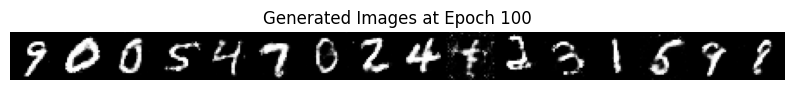

In [10]:
# Training the GAN
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(data_loader):
        # Real images
        real_imgs = imgs.to(device)
        batch_size = real_imgs.size(0)
        real_labels = torch.ones(batch_size, 1, device=device)  # Real label = 1
        fake_labels = torch.zeros(batch_size, 1, device=device)  # Fake label = 0

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(real_imgs), real_labels)
        z = torch.randn(batch_size, latent_dim, device=device)
        fake_imgs = generator(z)
        fake_loss = adversarial_loss(discriminator(fake_imgs.detach()), fake_labels)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        g_loss = adversarial_loss(discriminator(fake_imgs), real_labels)  # Generator tries to fool the discriminator
        g_loss.backward()
        optimizer_G.step()

    # Print progress
    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    # Generate and save some sample images every few epochs
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            z = torch.randn(16, latent_dim, device=device)
            generated_imgs = generator(z).cpu()
            generated_imgs = (generated_imgs + 1) / 2.0  # Denormalize to range [0, 1]
            grid_img = torch.cat([img for img in generated_imgs], dim=2).squeeze()
            plt.figure(figsize=(10, 5))
            plt.imshow(grid_img.numpy(), cmap='gray')
            plt.axis('off')
            plt.title(f"Generated Images at Epoch {epoch+1}")
            plt.show()

0.4906330406665802
torch.Size([1, 1, 28, 28])


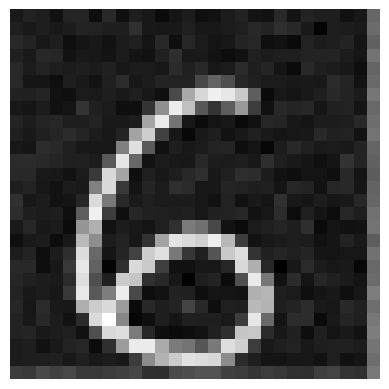

The image is predicted as Fake (Discriminator Output: 0.4906)


In [22]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained discriminator model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
discriminator = Discriminator().to(device)

# Function to preprocess the image
def preprocess_image(image_path):
    # Open the image and convert to grayscale
    img = Image.open(image_path).convert('L')
    
    # Resize image to 28x28 pixels (MNIST size)
    img = img.resize((28, 28))

    # Normalize the image to match the [-1, 1] range used during training
    transform = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize([0.5], [0.5])  # Normalize to range [-1, 1]
    ])
    
    img = transform(img).unsqueeze(0).to(device)  # Add batch dimension and move to device
    return img

# Function to predict if the image is real or fake
def predict_real_or_fake(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    
    # Pass the image through the discriminator
    output = discriminator(img)
    
    # The output of the discriminator is a probability (0-1) for real/fake
    prediction = output.item()
    print(prediction)
    print(img.shape)
    # Display the image
    plt.imshow(img[0].squeeze(0).cpu().detach().numpy(), cmap='gray')
    plt.axis('off')
    plt.show()

    # Return whether the image is real or fake based on the threshold
    if prediction > 0.5:
        print(f"The image is predicted as Real (Discriminator Output: {prediction:.4f})")
    else:
        print(f"The image is predicted as Fake (Discriminator Output: {prediction:.4f})")

# Example usage: replace with your actual PNG file path
image_path = r"C:\Users\Babua\Downloads\digitfake.jpg"
predict_real_or_fake(image_path)
